### IMDB Dataset

In [2]:
# Import Data
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words = 10000, for loading only 10000 most frequently occuring words.

# train_data is an encoding a sequence of words

In [21]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [22]:
train_labels[0]

1

In [23]:
max([max(sequence) for sequence in train_data])

9999

In [24]:
train_labels.shape

(25000,)

In [25]:
# integer to word mapping is word index
word_index = imdb.get_word_index()
# reversing from int to word towards word to key 
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
# It's finally decoded, offset 3 is for, "padding","starting of sequence", "unknown"
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [26]:
# Encoding integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
x_train.shape

(25000, 10000)

In [29]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
# Model compilation

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
              metrics=['accuracy'])

# Splitting the data in partial train & validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [43]:
x_val.shape

(10000, 10000)

In [44]:
partial_x_train.shape

(15000, 10000)

In [45]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 523us/step - loss: 0.5350 - acc: 0.7859 - val_loss: 0.4157 - val_acc: 0.8580
Epoch 2/20
15000/15000 [==============================] - 5s 324us/step - loss: 0.3228 - acc: 0.8985 - val_loss: 0.3173 - val_acc: 0.8813
Epoch 3/20
15000/15000 [==============================] - 5s 331us/step - loss: 0.2324 - acc: 0.9273 - val_loss: 0.2792 - val_acc: 0.8917
Epoch 4/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.1825 - acc: 0.9401 - val_loss: 0.2753 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.1473 - acc: 0.9533 - val_loss: 0.2761 - val_acc: 0.8897
Epoch 6/20
15000/15000 [==============================] - 4s 248us/step - loss: 0.1248 - acc: 0.9599 - val_loss: 0.2905 - val_acc: 0.8885
Epoch 7/20
15000/15000 [==============================] - 4s 241us/step - loss: 0.1029 - acc: 0.9704 - val_loss: 0.3074 - 

In [56]:
test_loss, test_acc = model.evaluate(x_test,y_test)

print("Test Loss:", test_loss)
print("Test Acc:", test_acc)

25000/25000 [==============================] - 4s 149us/step
Test Loss: 0.736994329422
Test Acc: 0.8474


In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

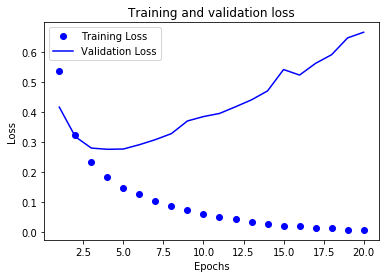

In [53]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

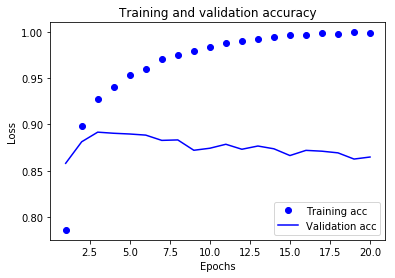

In [54]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The best values of validation data are at epoch=4

In [66]:
# Training with 4 epochs
model.fit(x_train, y_train, epochs=4, batch_size = 512)

Epoch 1/4
25000/25000 [==============================] - 3s 134us/step - loss: 0.0421 - acc: 0.9890
Epoch 2/4
25000/25000 [==============================] - 3s 116us/step - loss: 0.0338 - acc: 0.9919
Epoch 3/4
25000/25000 [==============================] - 3s 122us/step - loss: 0.0259 - acc: 0.9946
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.0243 - acc: 0.9944


In [67]:
test_loss, test_acc = model.evaluate(x_test,y_test)

print("Test Loss:", test_loss)
print("Test Acc:", test_acc)

25000/25000 [==============================] - 2s 61us/step
Test Loss: 0.754341191511
Test Acc: 0.8534


In [68]:
model.predict(x_test)

array([[ 0.0013481 ],
       [ 1.        ],
       [ 0.99998677],
       ..., 
       [ 0.0141245 ],
       [ 0.02128707],
       [ 0.77588516]], dtype=float32)